<a href="https://colab.research.google.com/github/SurajKande/python-pandas/blob/master/time_series_case_study_austin_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to connect gdrive to colab for importing dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as plotly

### trial 1 

In [0]:
data_frame_2011 = pd.read_csv('/content/gdrive/My Drive/datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None )

In [0]:
print(data_frame_2011.head())

      0         1    2   3       4  5      6   ... 37  38 39 40 41     42 43
0  13904  20110101   53  12  OVC045     10.00  ...     AA           29.95   
1  13904  20110101  153  12  OVC049     10.00  ...     AA           30.02   
2  13904  20110101  253  12  OVC060     10.00  ...     AA           30.02   
3  13904  20110101  353  12  OVC065     10.00  ...     AA           30.04   
4  13904  20110101  453  12  BKN070     10.00  ...     AA           30.04   

[5 rows x 44 columns]


In [0]:
#we have column labes as a string (comma seperated string)
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [0]:
#converting column_labels string to list 
column_labels_list = column_labels.split(',')
print(column_labels_list)

['Wban', 'date', 'Time', 'StationType', 'sky_condition', 'sky_conditionFlag', 'visibility', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren', 'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag', 'wet_bulb_faren', 'wet_bulb_farenFlag', 'wet_bulb_cel', 'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag', 'dew_point_cel', 'dew_point_celFlag', 'relative_humidity', 'relative_humidityFlag', 'wind_speed', 'wind_speedFlag', 'wind_direction', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressure', 'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag', 'presschange', 'presschangeFlag', 'sea_level_pressure', 'sea_level_pressureFlag', 'record_type', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk']


In [0]:
#assigning the column names to the data frame 
data_frame_2011.columns = column_labels_list

In [0]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,51,,10.6,,38,,3.1,,15,,-9.4,,24,,15,,360,,,,29.42,,,,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,51,,10.6,,37,,3.0,,14,,-10.0,,23,,10,,340,,,,29.49,,,,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,51,,10.6,,37,,2.9,,13,,-10.6,,22,,15,,010,,,,29.49,,1,,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,50,,10.0,,38,,3.1,,17,,-8.3,,27,,7,,350,,,,29.51,,,,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,50,,10.0,,37,,2.8,,15,,-9.4,,25,,11,,020,,,,29.51,,,,,,30.04,,AA,,,,30.04,


In [0]:
data_frame_2011.shape

(10337, 44)

In [0]:
data_frame_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 44 columns):
Wban                            10337 non-null int64
date                            10337 non-null int64
Time                            10337 non-null int64
StationType                     10337 non-null int64
sky_condition                   10337 non-null object
sky_conditionFlag               10337 non-null object
visibility                      10325 non-null object
visibilityFlag                  10337 non-null object
wx_and_obst_to_vision           10337 non-null object
wx_and_obst_to_visionFlag       10337 non-null object
dry_bulb_faren                  10337 non-null object
dry_bulb_farenFlag              10337 non-null object
dry_bulb_cel                    10337 non-null object
dry_bulb_celFlag                10337 non-null object
wet_bulb_faren                  10337 non-null object
wet_bulb_farenFlag              10337 non-null object
wet_bulb_cel                   

In [0]:
data_frame_2011.dropna(axis=1)   #trying to remove empty columns

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,,,,51,,10.6,,38,,3.1,,15,,-9.4,,24,,15,,360,,,,29.42,,,,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,,,,51,,10.6,,37,,3.0,,14,,-10.0,,23,,10,,340,,,,29.49,,,,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,,,,51,,10.6,,37,,2.9,,13,,-10.6,,22,,15,,010,,,,29.49,,1,,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,,,,50,,10.0,,38,,3.1,,17,,-8.3,,27,,7,,350,,,,29.51,,,,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,,,,50,,10.0,,37,,2.8,,15,,-9.4,,25,,11,,020,,,,29.51,,,,,,30.04,,AA,,,,30.04,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,13904,20111231,1953,12,CLR,,,,,56,,13.3,,51,,10.4,,46,,7.8,,69,,5,,200,,,,29.49,,,,,,30.03,,AA,,,,30.02,
10333,13904,20111231,2053,12,CLR,,,,,50,,10.0,,47,,8.3,,44,,6.7,,80,,0,,000,,,,29.52,,3,,026,,30.05,,AA,,,,30.05,
10334,13904,20111231,2153,12,CLR,,,,,51,,10.6,,48,,8.8,,45,,7.2,,80,,0,,000,,,,29.53,,,,,,30.06,,AA,,,,30.06,
10335,13904,20111231,2253,12,CLR,,,,,51,,10.6,,48,,9.1,,46,,7.8,,83,,3,,150,,,,29.56,,,,,,30.09,,AA,,,,30.09,


In [0]:
data_frame_2011.shape

(10337, 44)

In [0]:
assert data_frame_2011.iloc[1].loc['sky_conditionFlag'] != np.NaN     #checking if the value is empty or not

In [0]:
assert data_frame_2011.iloc[1].loc['StationType'] == np.NaN            #cheching if the value is empty or not

AssertionError: ignored

In [0]:
test_result = data_frame_2011.iloc[1].loc['sky_conditionFlag']
print(test_result)                                                     #printing the value 

In [0]:
for value in data_frame_2011[:]:
  if value == ' ':
    value = np.NaN                             #trying to replace the value with NaN

In [0]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,51,,10.6,,38,,3.1,,15,,-9.4,,24,,15,,360,,,,29.42,,,,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,51,,10.6,,37,,3.0,,14,,-10.0,,23,,10,,340,,,,29.49,,,,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,51,,10.6,,37,,2.9,,13,,-10.6,,22,,15,,010,,,,29.49,,1,,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,50,,10.0,,38,,3.1,,17,,-8.3,,27,,7,,350,,,,29.51,,,,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,50,,10.0,,37,,2.8,,15,,-9.4,,25,,11,,020,,,,29.51,,,,,,30.04,,AA,,,,30.04,


In [0]:
assert data_frame_2011.iloc[1].loc['sky_conditionFlag'] != np.NaN



---



---



---



### changed the dataset 

In [0]:
#changing the dataframe to a proper dataset
data_frame_2011 = pd.read_csv('/content/gdrive/My Drive/datasets/weather_data_austin_2011.csv', header=None )

In [0]:
data_frame_2010 = pd.read_csv('/content/gdrive/My Drive/datasets/weather_data_austin_2010.csv', header=0, parse_dates =True, index_col='Date' )

In [0]:
data_frame_2010.head()

In [8]:
data_frame_2011.shape

(10337, 44)

In [9]:
data_frame_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 44 columns):
0     10337 non-null int64
1     10337 non-null int64
2     10337 non-null int64
3     10337 non-null int64
4     10337 non-null object
5     10337 non-null object
6     10325 non-null object
7     10337 non-null object
8     10337 non-null object
9     10337 non-null object
10    10337 non-null object
11    10337 non-null object
12    10337 non-null object
13    10337 non-null object
14    10337 non-null object
15    10337 non-null object
16    10337 non-null object
17    10337 non-null object
18    10337 non-null object
19    10337 non-null object
20    10337 non-null object
21    10337 non-null object
22    10337 non-null object
23    10337 non-null object
24    10337 non-null object
25    10337 non-null object
26    10337 non-null object
27    10337 non-null object
28    10337 non-null object
29    10337 non-null object
30    10337 non-null object
31    10337 non-null object

In [10]:
data_frame_2011.dropna(axis=1)

,0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,,,,51,,10.6,,38,,3.1,,15,,-9.4,,24,,15,,360,,,,29.42,,,,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,,,,51,,10.6,,37,,3.0,,14,,-10.0,,23,,10,,340,,,,29.49,,,,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,,,,51,,10.6,,37,,2.9,,13,,-10.6,,22,,15,,010,,,,29.49,,1,,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,,,,50,,10.0,,38,,3.1,,17,,-8.3,,27,,7,,350,,,,29.51,,,,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,,,,50,,10.0,,37,,2.8,,15,,-9.4,,25,,11,,020,,,,29.51,,,,,,30.04,,AA,,,,30.04,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,13904,20111231,1953,12,CLR,,,,,56,,13.3,,51,,10.4,,46,,7.8,,69,,5,,200,,,,29.49,,,,,,30.03,,AA,,,,30.02,
10333,13904,20111231,2053,12,CLR,,,,,50,,10.0,,47,,8.3,,44,,6.7,,80,,0,,000,,,,29.52,,3,,026,,30.05,,AA,,,,30.05,
10334,13904,20111231,2153,12,CLR,,,,,51,,10.6,,48,,8.8,,45,,7.2,,80,,0,,000,,,,29.53,,,,,,30.06,,AA,,,,30.06,
10335,13904,20111231,2253,12,CLR,,,,,51,,10.6,,48,,9.1,,46,,7.8,,83,,3,,150,,,,29.56,,,,,,30.09,,AA,,,,30.09,


In [0]:
#we have column labes as a string (comma seperated string)
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [12]:
#converting column_labels string to list 
column_labels_list = column_labels.split(',')
print(column_labels_list)

['Wban', 'date', 'Time', 'StationType', 'sky_condition', 'sky_conditionFlag', 'visibility', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren', 'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag', 'wet_bulb_faren', 'wet_bulb_farenFlag', 'wet_bulb_cel', 'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag', 'dew_point_cel', 'dew_point_celFlag', 'relative_humidity', 'relative_humidityFlag', 'wind_speed', 'wind_speedFlag', 'wind_direction', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressure', 'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag', 'presschange', 'presschangeFlag', 'sea_level_pressure', 'sea_level_pressureFlag', 'record_type', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk']


In [0]:
#assigning the column names to the data frame 
data_frame_2011.columns = column_labels_list

In [14]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,51,,10.6,,38,,3.1,,15,,-9.4,,24,,15,,360,,,,29.42,,,,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,51,,10.6,,37,,3.0,,14,,-10.0,,23,,10,,340,,,,29.49,,,,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,51,,10.6,,37,,2.9,,13,,-10.6,,22,,15,,010,,,,29.49,,1,,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,50,,10.0,,38,,3.1,,17,,-8.3,,27,,7,,350,,,,29.51,,,,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,50,,10.0,,37,,2.8,,15,,-9.4,,25,,11,,020,,,,29.51,,,,,,30.04,,AA,,,,30.04,


In [0]:
assert data_frame_2011.iloc[1].loc['sky_conditionFlag'] != np.NaN     #checking if the value is empty or not

In [0]:
list_to_drop = ['sky_conditionFlag',
                'visibilityFlag',
                'wx_and_obst_to_vision',
                'wx_and_obst_to_visionFlag',
                'dry_bulb_farenFlag',
                'dry_bulb_celFlag',
                'wet_bulb_farenFlag',
                'wet_bulb_celFlag',
                'dew_point_farenFlag',
                'dew_point_celFlag',
                'relative_humidityFlag',
                'wind_speedFlag',
                'wind_directionFlag',
                'value_for_wind_character',
                'value_for_wind_characterFlag',
                'station_pressureFlag',
                'pressure_tendencyFlag',
                'pressure_tendency',
                'presschange',
                'presschangeFlag',
                'sea_level_pressureFlag',
                'hourly_precip',
                'hourly_precipFlag',
                'altimeter',
                'record_type',
                'altimeterFlag',
                'junk']

In [0]:
data_frame_2011 = data_frame_2011.drop(list_to_drop, axis = 1)

In [18]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [19]:
print(type(data_frame_2011['date']))

<class 'pandas.core.series.Series'>


In [20]:
data_frame_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null int64
Time                  10337 non-null int64
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(4), object(13)
memory usage: 1.3+ MB


In [0]:
data_frame_2011['date'] = data_frame_2011['date'].astype(str)
data_frame_2011['Time'] = data_frame_2011['Time'].astype(str)

In [22]:
data_frame_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(2), object(15)
memory usage: 1.3+ MB


In [0]:
data_frame_2011['Time'] = data_frame_2011['Time'].apply(lambda x:'{:0>4}'.format(x))    # formating time into XXXX pattern

In [0]:
dateTime_string = data_frame_2011['date'] + data_frame_2011['Time'] 

In [0]:
date_time = pd.to_datetime(dateTime_string, format='%Y%m%d%H%M')

In [26]:
print(date_time)

0       2011-01-01 00:53:00
1       2011-01-01 01:53:00
2       2011-01-01 02:53:00
3       2011-01-01 03:53:00
4       2011-01-01 04:53:00
                ...        
10332   2011-12-31 19:53:00
10333   2011-12-31 20:53:00
10334   2011-12-31 21:53:00
10335   2011-12-31 22:53:00
10336   2011-12-31 23:53:00
Length: 10337, dtype: datetime64[ns]


In [0]:
data_frame_2011.set_index(date_time, inplace=True, )

In [28]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [29]:
data_frame_2011.tail()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-12-31 19:53:00,13904,20111231,1953,12,CLR,10.00,56,13.3,51,10.4,46,7.8,69,5,200,29.49,30.03
2011-12-31 20:53:00,13904,20111231,2053,12,CLR,10.00,50,10.0,47,8.3,44,6.7,80,0,000,29.52,30.05
2011-12-31 21:53:00,13904,20111231,2153,12,CLR,10.00,51,10.6,48,8.8,45,7.2,80,0,000,29.53,30.06
2011-12-31 22:53:00,13904,20111231,2253,12,CLR,10.00,51,10.6,48,9.1,46,7.8,83,3,150,29.56,30.09
2011-12-31 23:53:00,13904,20111231,2353,12,CLR,10.00,46,7.8,45,7.2,44,6.7,93,3,260,29.59,30.11


In [30]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(data_frame_2011.loc['2011-06-20 08:00:00' : '2011-06-20 09:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


In [0]:
# Convert the dry_bulb_faren column to numeric values
data_frame_2011['dry_bulb_faren'] = pd.to_numeric(data_frame_2011['dry_bulb_faren'], errors='coerce')

In [34]:
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(data_frame_2011.loc['2011-06-20 08:00:00' : '2011-06-20 09:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [0]:
# Convert the wind_speed and dew_point_faren columns to numeric values
data_frame_2011['wind_speed'] = pd.to_numeric(data_frame_2011['wind_speed'], errors='coerce')
data_frame_2011['dew_point_faren'] =  pd.to_numeric(data_frame_2011['dew_point_faren'], errors='coerce')

In [36]:
data_frame_2011.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


In [53]:
# Print the median of the dry_bulb_faren column
print(data_frame_2011['dry_bulb_faren'].median())

72.0


In [55]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(data_frame_2011.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

78.0


In [56]:
# Print the median of the dry_bulb_faren column for the month of January
print(data_frame_2011.loc['2011-Jan', 'dry_bulb_faren'].median())

48.0


In [0]:
# Downsample data frame by day and aggregate by mean
date_frame_2011_daily_mean = data_frame_2011.resample('D').mean()

In [68]:
date_frame_2011_daily_mean.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.083333
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [0]:
# Extract the dry_bulb_faren column 
daily_temp_2011 = date_frame_2011_daily_mean['dry_bulb_faren'].values

In [74]:
print(type(daily_temp_2011))

<class 'numpy.ndarray'>


In [73]:
daily_temp_2011[:10]    #printing first 10 values

array([50.16666667, 39.41666667, 46.84615385, 53.36734694, 57.96551724,
       46.95833333, 51.91666667, 51.81481481, 43.61363636, 38.27777778])

In [0]:
# Downsample df_climate by day and aggregate by mean
daily_temp_2010 = data_frame_2010.resample('D').mean()

In [82]:
daily_temp_2010.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [0]:
# Extract the Temperature column from daily_climate
daily_temp_2010 = (daily_temp_2010.reset_index()).Temperature

In [84]:
daily_temp_2010.head()

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
Name: Temperature, dtype: float64

In [0]:
difference = daily_temp_2011 - daily_temp_2010

In [87]:
print(difference)

0       0.829167
1     -10.379167
2      -3.053846
3       3.638180
4       8.123851
         ...    
360    -4.370833
361    -3.229167
362     1.515833
363     3.533333
364     5.262500
Name: Temperature, Length: 365, dtype: float64


In [86]:
print(difference.mean())

1.3301831870056482


In [107]:
data_frame_2011.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01


In [106]:
data_frame_2011['sky_condition'].head()

2011-01-01 00:53:00    OVC045
2011-01-01 01:53:00    OVC049
2011-01-01 02:53:00    OVC060
2011-01-01 03:53:00    OVC065
2011-01-01 04:53:00    BKN070
Name: sky_condition, dtype: object

In [0]:
# checking max temperature of sunny days in 2011 
sunny_days_2011 = data_frame_2011[data_frame_2011['sky_condition'] == 'CLR']

In [105]:
sunny_days_2011.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,10.00,59.0,15.0,45,7.0,26.0,-3.3,28,14.0,010,29.63,30.16
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,10.00,59.0,15.0,45,7.2,27.0,-2.8,29,16.0,360,29.63,30.16
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,10.00,57.0,13.9,44,6.6,27.0,-2.8,32,11.0,350,29.63,30.17


In [0]:
sunny_days_2011_max_temp = sunny_days_2011.resample('D').max()

In [99]:
print(sunny_days_2011_max_temp)

               Wban      date  ... station_pressure  sea_level_pressure
2011-01-01  13904.0  20110101  ...            29.78               30.33
2011-01-02  13904.0  20110102  ...            29.82               30.38
2011-01-03  13904.0  20110103  ...            29.71               30.27
2011-01-04      NaN       NaN  ...              NaN                 NaN
2011-01-05  13904.0  20110105  ...            29.54               30.08
...             ...       ...  ...              ...                 ...
2011-12-27  13904.0  20111227  ...            29.73               30.28
2011-12-28  13904.0  20111228  ...            29.68               30.23
2011-12-29  13904.0  20111229  ...            29.52                   M
2011-12-30  13904.0  20111230  ...            29.54               30.07
2011-12-31  13904.0  20111231  ...            29.59               30.11

[365 rows x 16 columns]


In [0]:
# checking max temperature of sunny days in 2011 
overcast_days_2011 = data_frame_2011[data_frame_2011['sky_condition'].str.contains('OVC')]

In [108]:
overcast_days_2011.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01


In [0]:
overcast_days_2011_max_temp = overcast_days_2011.resample('D').max()

In [0]:
difference = sunny_days_2011_max_temp.mean() - overcast_days_2011_max_temp.mean()

In [111]:
print(difference)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


from the above analysis we can say that, The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.

In [112]:
data_frame_2011.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01


In [131]:
data_frame_2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.7+ MB


In [0]:
data_frame_2011['visibility'] = data_frame_2011['visibility'].astype(str)             #converting the visibility to str

In [0]:
data_frame_2011['visibility'] = pd.to_numeric(data_frame_2011['visibility'], errors='coerce')          #converting the visibility to int

In [0]:
data_frame_2011['visibility'] = data_frame_2011['visibility'].astype(float)                 #converting the visibility to float

In [141]:
data_frame_2011['visibility']

2011-01-01 00:53:00    10.0
2011-01-01 01:53:00    10.0
2011-01-01 02:53:00    10.0
2011-01-01 03:53:00    10.0
2011-01-01 04:53:00    10.0
                       ... 
2011-12-31 19:53:00    10.0
2011-12-31 20:53:00    10.0
2011-12-31 21:53:00    10.0
2011-12-31 22:53:00    10.0
2011-12-31 23:53:00    10.0
Name: visibility, Length: 10337, dtype: float64

In [142]:
data_frame_2011['dry_bulb_faren']

2011-01-01 00:53:00    51.0
2011-01-01 01:53:00    51.0
2011-01-01 02:53:00    51.0
2011-01-01 03:53:00    50.0
2011-01-01 04:53:00    50.0
                       ... 
2011-12-31 19:53:00    56.0
2011-12-31 20:53:00    50.0
2011-12-31 21:53:00    51.0
2011-12-31 22:53:00    51.0
2011-12-31 23:53:00    46.0
Name: dry_bulb_faren, Length: 10337, dtype: float64

In [155]:
data_frame_2011[['visibility', 'dry_bulb_faren']].head()

,visibility,dry_bulb_faren
2011-01-01 00:53:00,10.0,51.0
2011-01-01 01:53:00,10.0,51.0
2011-01-01 02:53:00,10.0,51.0
2011-01-01 03:53:00,10.0,50.0
2011-01-01 04:53:00,10.0,50.0


In [0]:
weekly_mean_2011 = data_frame_2011[['visibility', 'dry_bulb_faren']].resample('W').mean()

In [145]:
weekly_mean_2011.head()

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.791667
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188


In [147]:
print(weekly_mean_2011.corr())

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


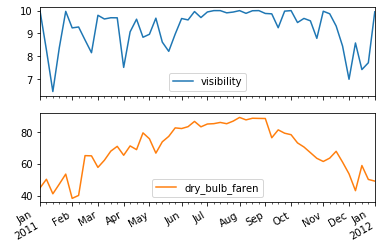

In [150]:
weekly_mean_2011.plot(subplots = True)
plt.show()

In [0]:
sunny_days_2011_daily_hours = sunny_days_2011.resample('D').sum()

In [159]:
sunny_days_2011_daily_hours.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,152944,132,529.0,277.0,108.0
2011-01-02,97328,84,205.0,147.0,37.0
2011-01-03,41712,36,93.0,75.0,0.0
2011-01-04,0,0,0.0,0.0,0.0
2011-01-05,13904,12,35.0,29.0,0.0


In [0]:
sunny_days_2011_daily_total_hours = sunny_days_2011.resample('D').count()

In [162]:
sunny_days_2011_daily_total_hours.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2011-01-02,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2011-01-03,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2011-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-01-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
sunny_fraction = sunny_days_2011_daily_hours / sunny_days_2011_daily_total_hours

In [164]:
sunny_fraction.head()

,StationType,Time,Wban,date,dew_point_cel,dew_point_faren,dry_bulb_cel,dry_bulb_faren,relative_humidity,sea_level_pressure,sky_condition,station_pressure,visibility,wet_bulb_cel,wet_bulb_faren,wind_direction,wind_speed
2011-01-01,12.0,NaN,13904.0,NaN,NaN,25.181818,NaN,48.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.818182
2011-01-02,12.0,NaN,13904.0,NaN,NaN,21.000000,NaN,29.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.285714
2011-01-03,12.0,NaN,13904.0,NaN,NaN,25.000000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,12.0,NaN,13904.0,NaN,NaN,29.000000,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


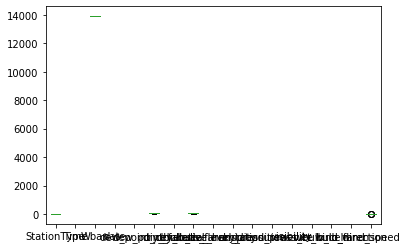

In [167]:
sunny_fraction.plot(kind='box')
plt.show()